<a href="https://colab.research.google.com/github/Vinitkhapekar/Machine/blob/main/LAB_4_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SVM**

In [ ]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [ ]:
x, y = make_classification(
    n_samples=200,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)  # 80/20 split

In [ ]:
plt.scatter(x,y,c=y,cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [ ]:
print(log_reg.coef_)
print(log_reg.intercept_)

In [ ]:
y_pred = log_reg.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
x_train

In [ ]:
y_train

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [ ]:
df = pd.DataFrame({'x': x_train.flatten(), 'y': y_train})
df.head()

,x,y
0,1.101485,1
1,0.138389,1
2,-0.404777,1
3,-1.251761,0
4,-1.031525,0


In [ ]:
import numpy as np

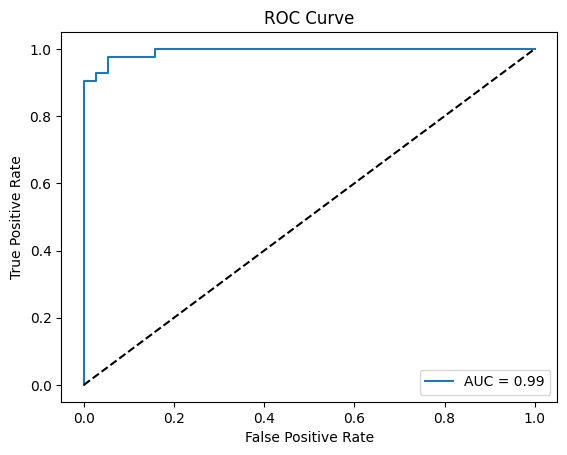

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = log_reg.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)

print(f"Precision: {precision}")

Precision: 0.9534883720930233


In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)

print(f"Recall: {recall}")

Recall: 0.9761904761904762


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df['Species'] = df['Species'].replace({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})

<ipython-input-30-9684b7e19048>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Species'] = df['Species'].replace({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})


In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']],df['Species'],train_size=0.1)

In [ ]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
142,5.8,2.7,5.1,1.9
14,5.8,4.0,1.2,0.2
124,6.7,3.3,5.7,2.1
134,6.1,2.6,5.6,1.4
88,5.6,3.0,4.1,1.3
96,5.7,2.9,4.2,1.3
103,6.3,2.9,5.6,1.8
101,5.8,2.7,5.1,1.9
62,6.0,2.2,4.0,1.0
146,6.3,2.5,5.0,1.9


In [ ]:
y_train

,Species
142,3
14,1
124,3
134,3
88,2
96,2
103,3
101,3
62,2
146,3


In [ ]:
from sklearn import linear_model
mymodel = linear_model.LogisticRegression(max_iter=120)
mymodel.fit(X_train,y_train)

LogisticRegression(max_iter=120)

In [ ]:
from sklearn.svm import SVC


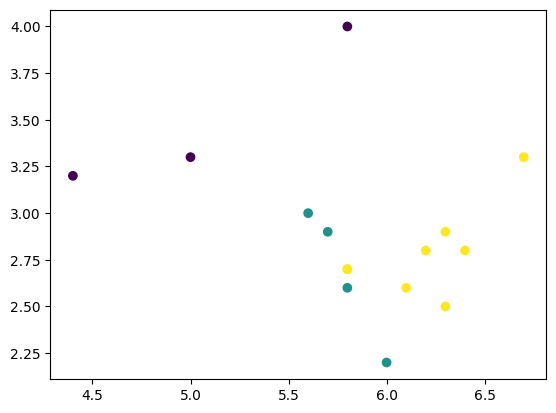

In [ ]:
import matplotlib.pyplot as plt # import matplotlib
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Convert X_train to a NumPy array if it's a Pandas DataFrame
X_train_array = X_train.values if isinstance(X_train, pd.DataFrame) else X_train

# Assuming you want to visualize the decision boundaries
# Replace this with your desired visualization code
plt.scatter(X_train_array[:, 0], X_train_array[:, 1], c=y_train)
plt.show()

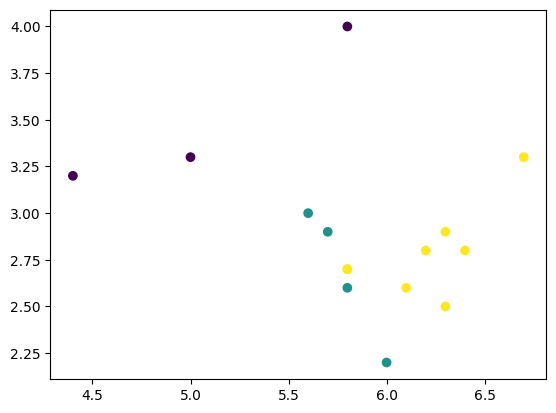

In [ ]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train) # Use .iloc to access columns by position in a DataFrame
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC



svm = SVC(kernel='linear')
# Ensure that X_train has the correct number of features (4 in this case)
svm.fit(X_train, y_train)

# If you only want to visualize the decision boundary for the first two features
# create a new dataset with only those two features
X_train_for_plot

,SepalLengthCm,SepalWidthCm
142,5.8,2.7
14,5.8,4.0
124,6.7,3.3
134,6.1,2.6
88,5.6,3.0
96,5.7,2.9
103,6.3,2.9
101,5.8,2.7
62,6.0,2.2
146,6.3,2.5


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


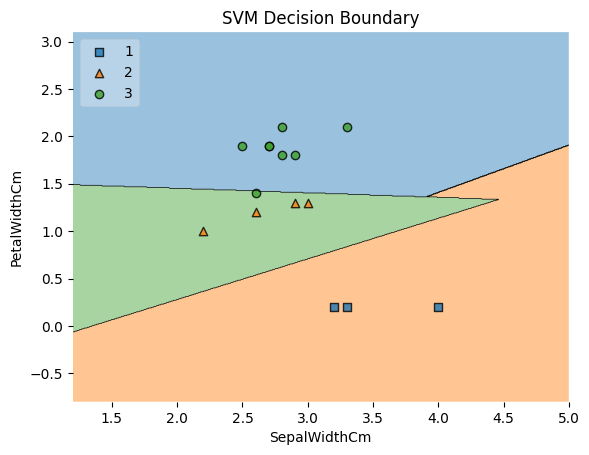

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC

# ... (your code to load and prepare data)

# Select the desired features for training
# For example, to use features at index 1 and 3:
selected_features = [1, 3]
X_train_selected = X_train.iloc[:, selected_features]

svm = SVC(kernel='linear')
svm.fit(X_train_selected, y_train)

# For visualization, use the same features used for training
X_train_for_plot = X_train_selected

# Ensure y_train is a 1D array
y_train_for_plot = y_train.values.ravel()

plot_decision_regions(X_train_for_plot.values, y_train_for_plot, clf=svm, legend=2)
plt.xlabel(X_train_for_plot.columns[0])
plt.ylabel(X_train_for_plot.columns[1])
plt.title('SVM Decision Boundary')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load and prepare your data here
# Replace the following with your actual data loading and preparation code
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select features for training (same as for SVM)
selected_features = [1, 3]
X_train_selected = X_train[:, selected_features] # Use indexing for NumPy arrays
X_test_selected = X_test[:, selected_features]

# Train the SVM model (as before)
svm = SVC(kernel='linear')
svm.fit(X_train_selected, y_train)

# Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_selected, y_train)

# ... (rest of your code for evaluation, visualization, etc.)

DecisionTreeClassifier()

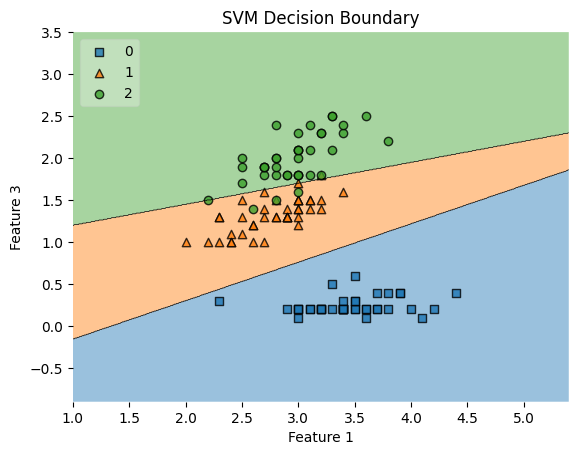

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
!pip install mlxtend

iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select features for training (same as for SVM)
selected_features = [1, 3]
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Train the SVM model (as before)
svm = SVC(kernel='linear')
svm.fit(X_train_selected, y_train)

# Train a Decision Tree Classifier (not used for plotting)
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_selected, y_train)

# Plot decision boundaries
plot_decision_regions(X_train_selected, y_train, clf=svm, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 3')
plt.title('SVM Decision Boundary')
plt.show()